In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
model = ResNet50(include_top=True,
weights="imagenet",
input_tensor=None,
input_shape=None,
pooling=None,
classes=1000)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-02-02 23:21:59.790341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-02 23:21:59.790538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


102981632/102967424 [==============================] - 8s 0us/step


In [7]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [10]:
model.trainable = False
model = Sequential([model, Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
BATCH_SIZE = 32
image_height = 100
image_weidth = 100
train_dir = "/Users/jhyunwoo/Documents/Programing/tensorflow-study/chap5/data/catanddog/train"
valid_dir = "/Users/jhyunwoo/Documents/Programing/tensorflow-study/chap5/data/catanddog/validation"

train = ImageDataGenerator(rescale=1./255, rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1)
train_generator = train.flow_from_directory(train_dir, target_size=(image_height, image_weidth), color_mode='rgb', batch_size=BATCH_SIZE, seed=1, shuffle=True, class_mode='categorical')

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir, target_size=(image_height, image_weidth), color_mode='rgb', batch_size=BATCH_SIZE, seed=7, shuffle=True, class_mode="categorical")

history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10


2022-02-02 23:39:28.419946: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-02 23:39:29.276263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 23:39:35.412882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 - 8s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5102 - 8s/epoch - 626ms/step
Epoch 2/10
13/13 - 1s - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6931 - val_accuracy: 0.5102 - 1s/epoch - 108ms/step
Epoch 3/10
13/13 - 2s - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6931 - val_accuracy: 0.5612 - 2s/epoch - 115ms/step
Epoch 4/10
13/13 - 1s - loss: 0.6931 - accuracy: 0.5325 - val_loss: 0.6931 - val_accuracy: 0.5000 - 1s/epoch - 113ms/step
Epoch 5/10
13/13 - 2s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 2s/epoch - 119ms/step
Epoch 6/10
13/13 - 2s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 2s/epoch - 125ms/step
Epoch 7/10
13/13 - 2s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 2s/epoch - 121ms/step
Epoch 8/10
13/13 - 2s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 2s/epoch - 120ms/step
Epoch 9/10
13/13 - 2s - loss: 0.692

Text(0.5, 1.0, 'Error')

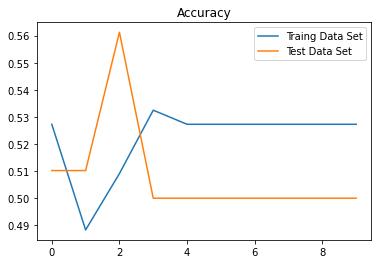

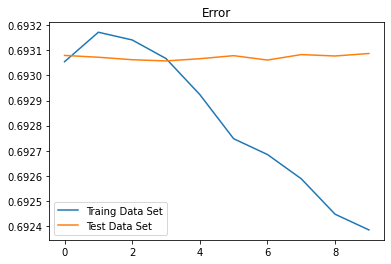

In [17]:
import matplotlib as mpl
import matplotlib .pylab as plt
from matplotlib import font_manager

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Traing Data Set')
plt.plot(epochs, val_accuracy, label='Test Data Set')
plt.legend()
plt.title('Accuracy')
plt.figure()

plt.plot(epochs, loss, label='Traing Data Set')
plt.plot(epochs, val_loss, label='Test Data Set')
plt. legend()
plt.title('Error')
